<a href="https://colab.research.google.com/github/Khalid-Rafiq-01/Concrete-Crack-Classification/blob/main/Testing_Crack_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [34]:
!wget "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5fRxvAe-W_zS5fO6yOgODlbr2Ul2s12IJsRU2euGyRw&usqp=CAU&ec=48665701"

--2023-04-25 09:30:14--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5fRxvAe-W_zS5fO6yOgODlbr2Ul2s12IJsRU2euGyRw&usqp=CAU&ec=48665701
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.253.122.100, 172.253.122.139, 172.253.122.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.253.122.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7435 (7.3K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcT5fRxvAe-W_zS5fO6yOgODlbr2Ul2s12IJsRU2euGyRw&usqp=CAU&ec=48665701’

images?q=tbn:ANd9Gc 100%[===================>]   7.26K  --.-KB/s    in 0s      

2023-04-25 09:30:14 (67.9 MB/s) - ‘images?q=tbn:ANd9GcT5fRxvAe-W_zS5fO6yOgODlbr2Ul2s12IJsRU2euGyRw&usqp=CAU&ec=48665701’ saved [7435/7435]



Text(0.5, 1.0, '(168, 300, 3)')

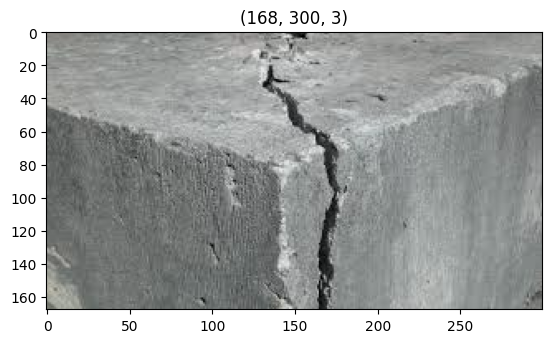

In [35]:
path = '/content/images?q=tbn:ANd9GcT5fRxvAe-W_zS5fO6yOgODlbr2Ul2s12IJsRU2euGyRw&usqp=CAU&ec=48665701'
test_image = cv2.imread(path)
plt.imshow(test_image)
plt.title(test_image.shape)

In [36]:
# Resizing the above image to the shape and format as expected by the DL model:
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis = 0)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
preprocess = ImageDataGenerator(rescale = 1./255)
img = preprocess.flow(test_image, batch_size = 1)

In [38]:
print(type(img))

<class 'keras.preprocessing.image.NumpyArrayIterator'>


**Loading the Pretrained Finetuned Model**

In [39]:
import keras
from keras.models import load_model
model_path = '/content/drive/MyDrive/Trained Model Concrecte Crack Classification/pretrained_crack_model_fine_tune.h5'
model = load_model(model_path)

In [40]:
prediction = model.predict(img, verbose = 0) # Will result in a sigmoid output i.e probability bet 0 and 1
# Keeping a threshold as done whie training the model
pred = np.squeeze((prediction>0.5).astype('int'))
outputs = ['Cracked', 'Not Cracked']
if pred == 1:
  print(f'Model predicts: {outputs[0]}')
else:
  print(f'Model predicts: {outputs[1]}')

Model predicts: Cracked
